This notebook contain code to do co-association analysis of cancer stage with the hallmarks. (Figure 4)

In [26]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data Load

In [27]:
surv = pd.read_csv('tcga_hallmark_pred.csv', index_col=0)
surv = round(surv[['AIM', 'DCE', 'EGS', 'GIM', 'RCD', 'SPS', 'AID', 'IA', 'ERI', 'TPI']])
surv

,AIM,DCE,EGS,GIM,RCD,SPS,AID,IA,ERI,TPI
TCGA-FA-8693,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
TCGA-FA-A4BB,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
TCGA-FA-A4XK,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
TCGA-FA-A6HN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
TCGA-FA-A6HO,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
TCGA-AB-3007,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
TCGA-AB-3008,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
TCGA-AB-3009,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
TCGA-AB-3011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [28]:
patient_info = pd.read_csv('patient_info.csv', index_col=(0))
patient_info

,SUBTYPE,CANCER_TYPE_ACRONYM,OTHER_PATIENT_ID,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,DAYS_LAST_FOLLOWUP,DAYS_TO_BIRTH,DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS,...,WEIGHT,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-2K-A9WE,KIRP,KIRP,73292C19-D6A8-4BC4-97BC-CCCE54F264F8,53.0,Male,STAGE II,7TH,214.0,-19603.0,0.0,...,97.73,Yes,0:LIVING,7.035539,0:ALIVE OR DEAD TUMOR FREE,7.035539,0:DiseaseFree,7.035539,0:CENSORED,7.035539
TCGA-2Z-A9J1,KIRP,KIRP,851A1157-E460-4794-8534-2EB6F0AE7468,71.0,Male,STAGE I,6TH,2298.0,-26244.0,0.0,...,96.10,Yes,0:LIVING,75.549857,0:ALIVE OR DEAD TUMOR FREE,75.549857,0:DiseaseFree,75.549857,0:CENSORED,75.549857
TCGA-2Z-A9J2,KIRP,KIRP,95CB399C-0A6F-4BD8-8146-36F367F30611,71.0,Female,STAGE I,6TH,1795.0,-26134.0,0.0,...,62.50,Yes,0:LIVING,59.013052,0:ALIVE OR DEAD TUMOR FREE,59.013052,0:DiseaseFree,59.013052,0:CENSORED,59.013052
TCGA-2Z-A9J3,KIRP,KIRP,5195C9AC-B649-49F8-8750-F9A4787E8E52,67.0,Male,STAGE II,6TH,NaN,-24626.0,0.0,...,86.40,Yes,1:DECEASED,58.224019,1:DEAD WITH TUMOR,58.224019,NaN,NaN,1:PROGRESSION,25.972318
TCGA-2Z-A9J5,KIRP,KIRP,DA0289C6-FF84-4063-BA99-A0D0A338F6CD,80.0,Male,STAGE II,6TH,3050.0,-29275.0,0.0,...,105.20,Yes,0:LIVING,100.272874,0:ALIVE OR DEAD TUMOR FREE,100.272874,NaN,NaN,0:CENSORED,100.272874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-VQ-AA6I,STAD_CIN,STAD,3CCBE7C7-C779-4A98-B495-FF020D3E9E55,68.0,Male,STAGE IIIB,7TH,NaN,-25091.0,0.0,...,NaN,Yes,1:DECEASED,16.142289,1:DEAD WITH TUMOR,16.142289,NaN,NaN,1:PROGRESSION,15.616267
TCGA-VQ-AA6J,STAD_CIN,STAD,A267DDB4-B2D9-4292-B120-6E13E70D01F8,75.0,Male,STAGE IIIB,7TH,838.0,-27506.0,0.0,...,NaN,Yes,0:LIVING,27.550383,0:ALIVE OR DEAD TUMOR FREE,27.550383,0:DiseaseFree,27.550383,0:CENSORED,27.550383
TCGA-VQ-AA6K,STAD_CIN,STAD,83A0F9EF-4BF0-4EFE-8713-F8B6AB4F5773,59.0,Male,STAGE IIIC,6TH,NaN,-21901.0,0.0,...,NaN,Yes,1:DECEASED,12.427261,1:DEAD WITH TUMOR,12.427261,NaN,NaN,1:PROGRESSION,10.914949


In [29]:
patient_info.columns

Index(['SUBTYPE', 'CANCER_TYPE_ACRONYM', 'OTHER_PATIENT_ID', 'AGE', 'SEX',
       'AJCC_PATHOLOGIC_TUMOR_STAGE', 'AJCC_STAGING_EDITION',
       'DAYS_LAST_FOLLOWUP', 'DAYS_TO_BIRTH',
       'DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS', 'ETHNICITY',
       'FORM_COMPLETION_DATE', 'HISTORY_NEOADJUVANT_TRTYN', 'ICD_10',
       'ICD_O_3_HISTOLOGY', 'ICD_O_3_SITE', 'INFORMED_CONSENT_VERIFIED',
       'NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT', 'PATH_M_STAGE',
       'PATH_N_STAGE', 'PATH_T_STAGE', 'PERSON_NEOPLASM_CANCER_STATUS',
       'PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT', 'PRIOR_DX', 'RACE',
       'RADIATION_THERAPY', 'WEIGHT', 'IN_PANCANPATHWAYS_FREEZE', 'OS_STATUS',
       'OS_MONTHS', 'DSS_STATUS', 'DSS_MONTHS', 'DFS_STATUS', 'DFS_MONTHS',
       'PFS_STATUS', 'PFS_MONTHS'],
      dtype='object')

# AJCC PATHOLOGIC TUMOR STAGE

In [15]:
patient_info1 = patient_info[['AJCC_PATHOLOGIC_TUMOR_STAGE']]
patient_info1 = patient_info1[~patient_info1['AJCC_PATHOLOGIC_TUMOR_STAGE'].isin(['STAGE X', 'STAGE I/II (NOS)'])]
stage_mapping = {
    'STAGE 0': 'STAGE 0',
    'STAGE I': 'STAGE I', 'STAGE IA': 'STAGE I', 'STAGE IB': 'STAGE I',
    'STAGE II': 'STAGE II', 'STAGE IIA': 'STAGE II', 'STAGE IIB': 'STAGE II', 'STAGE IIC': 'STAGE II',
    'STAGE III': 'STAGE III', 'STAGE IIIA': 'STAGE III', 'STAGE IIIB': 'STAGE III', 'STAGE IIIC': 'STAGE III',
    'STAGE IV': 'STAGE IV', 'STAGE IVA': 'STAGE IV', 'STAGE IVB': 'STAGE IV', 'STAGE IVC': 'STAGE IV'
}

patient_info1['AJCC_PATHOLOGIC_TUMOR_STAGE'] = patient_info1['AJCC_PATHOLOGIC_TUMOR_STAGE'].map(stage_mapping)
patient_info1 = pd.concat([patient_info1, surv], axis=1).dropna()
patient_info1 = pd.concat([patient_info1, pd.get_dummies(patient_info1["AJCC_PATHOLOGIC_TUMOR_STAGE"], dtype=int)], axis=1)
patient_info1.drop("AJCC_PATHOLOGIC_TUMOR_STAGE", axis=1, inplace=True)
patient_info1 = patient_info1.astype(int)
patient_info1

,AIM,DCE,EGS,GIM,RCD,SPS,AID,IA,ERI,TPI,STAGE 0,STAGE I,STAGE II,STAGE III,STAGE IV
TCGA-2K-A9WE,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0
TCGA-2Z-A9J1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0
TCGA-2Z-A9J2,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0
TCGA-2Z-A9J3,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0
TCGA-2Z-A9J5,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-YA-A8S7,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0
TCGA-ZS-A9CD,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0
TCGA-ZS-A9CE,1,1,1,0,1,1,1,0,1,1,0,0,1,0,0
TCGA-ZS-A9CF,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0


In [137]:
hallmarks_correlation = patient_info1.columns
correlation_matrix = pd.DataFrame(np.zeros((len(hallmarks_correlation), len(hallmarks_correlation))), 
                                      index=hallmarks_correlation, columns=hallmarks_correlation)
correlation_p = correlation_matrix.copy()
for i, h1 in enumerate(hallmarks_correlation):
    for j, h2 in enumerate(hallmarks_correlation):
        if h1 != h2:  # Only calculate for upper triangle
            try:
                # Create a contingency table for the two hallmarks
                contingency_table = pd.crosstab(patient_info1[h2], patient_info1[h1])
                oddsratio, pvalue = stats.fisher_exact(contingency_table)
                correlation_matrix.loc[h1, h2] = oddsratio
                correlation_p.loc[h1, h2] = pvalue
            except:
                pass
correlation_matrix = correlation_matrix.iloc[:10, 11:].T
correlation_p = correlation_p.iloc[:10, 11:].T
correlation_matrix

,AIM,DCE,EGS,GIM,RCD,SPS,AID,IA,ERI,TPI
STAGE I,0.657247,0.557081,0.682645,0.620233,0.445302,0.658111,0.565446,0.586863,0.473536,0.594006
STAGE II,1.045953,1.274350,0.968188,1.017662,1.469475,0.994490,1.239779,1.095657,1.651774,1.021317
STAGE III,1.084050,1.073807,1.228361,1.174225,1.302000,1.157468,1.061743,1.144598,1.122462,1.289041
STAGE IV,2.856419,2.834258,2.221718,3.345305,2.614132,2.877311,3.057471,3.461885,2.000000,3.009375


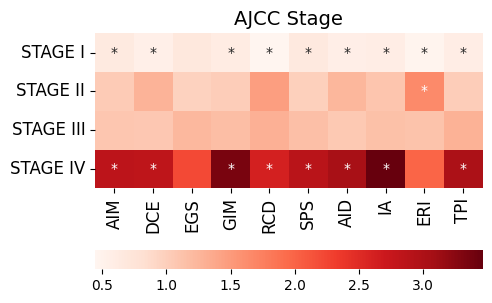

In [144]:
annotations = correlation_p.map(lambda x: '*' if x < 0.05 else '')
    
# Plotting the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=annotations, fmt='', cmap='Reds', square=True,
            cbar_kws={'orientation': 'horizontal', 'pad': 0.2})

ax = plt.gca()
ax.tick_params(axis='y', labelsize=12, rotation=0)
ax.tick_params(axis='x', labelsize=12, rotation=90)
plt.title('AJCC Stage', size=14)
plt.savefig(f'odds_ajcc_hallmark.png', dpi=1200, bbox_inches='tight')
plt.show()

# NODE STAGE

In [30]:
patient_info1 = patient_info[['PATH_N_STAGE']]
patient_info1 = patient_info1[~patient_info1['PATH_N_STAGE'].isin(['NX'])]
n_mapping = {
    'N0': 'n0', 'N0 (I+)': 'n0', 'N0 (I-)': 'n0', 'N0 (MOL+)': 'n0',
    'N1': 'n1', 'N1A': 'n1', 'N1B': 'n1', 'N1C': 'n1', 'N1MI': 'n1',
    'N2': 'n2/3', 'N2A': 'n2/3', 'N2B': 'n2/3', 'N2C': 'n2/3',
    'N3': 'n2/3', 'N3A': 'n2/3', 'N3B': 'n2/3', 'N3C': 'n2/3',
}
patient_info1['PATH_N_STAGE'] = patient_info1['PATH_N_STAGE'].map(n_mapping)
patient_info1 = pd.concat([patient_info1, surv], axis=1).dropna()
patient_info1 = pd.concat([patient_info1, pd.get_dummies(patient_info1["PATH_N_STAGE"], dtype=int)], axis=1)
patient_info1.drop("PATH_N_STAGE", axis=1, inplace=True)
patient_info1 = patient_info1.astype(int)
patient_info1

,AIM,DCE,EGS,GIM,RCD,SPS,AID,IA,ERI,TPI,n0,n1,n2/3
TCGA-2Z-A9J1,1,1,1,1,1,1,1,1,1,1,1,0,0
TCGA-2Z-A9JO,1,1,1,1,1,1,1,1,1,1,1,0,0
TCGA-4A-A93W,1,1,1,1,1,1,1,1,1,1,1,0,0
TCGA-4A-A93X,1,1,1,1,1,1,1,1,1,1,0,1,0
TCGA-4A-A93Y,1,1,1,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-UB-A7MC,1,1,1,1,1,1,1,1,1,1,1,0,0
TCGA-UB-A7MD,1,1,1,1,1,1,1,1,1,1,1,0,0
TCGA-XR-A8TD,1,1,1,1,1,1,1,1,1,1,1,0,0
TCGA-XR-A8TE,1,1,1,1,1,1,1,1,1,1,1,0,0


In [31]:
hallmarks_correlation = patient_info1.columns
correlation_matrix = pd.DataFrame(np.zeros((len(hallmarks_correlation), len(hallmarks_correlation))), 
                                      index=hallmarks_correlation, columns=hallmarks_correlation)
correlation_p = correlation_matrix.copy()
for i, h1 in enumerate(hallmarks_correlation):
    for j, h2 in enumerate(hallmarks_correlation):
        if h1 != h2:  # Only calculate for upper triangle
            try:
                # Create a contingency table for the two hallmarks
                contingency_table = pd.crosstab(patient_info1[h2], patient_info1[h1])
                oddsratio, pvalue = stats.fisher_exact(contingency_table)
                correlation_matrix.loc[h1, h2] = oddsratio
                correlation_p.loc[h1, h2] = pvalue
            except:
                pass
correlation_matrix = correlation_matrix.iloc[:10, 10:].T
correlation_p = correlation_p.iloc[:10, 10:].T
correlation_matrix

,AIM,DCE,EGS,GIM,RCD,SPS,AID,IA,ERI,TPI
n0,0.788117,0.784322,0.869886,0.609438,0.725663,0.742247,0.548458,0.482679,0.530814,0.679626
n1,0.976415,1.143714,1.050243,1.230790,1.185561,1.123302,1.273888,1.460627,1.967516,1.141361
n2/3,1.741528,1.319809,1.218991,2.095105,1.472468,1.536547,2.594714,2.740505,1.357124,1.845102


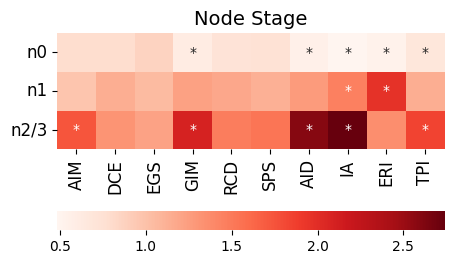

In [32]:
annotations = correlation_p.map(lambda x: '*' if x < 0.05 else '')
    
# Plotting the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=annotations, fmt='', cmap='Reds', square=True,
            cbar_kws={'orientation': 'horizontal', 'pad': 0.2})

ax = plt.gca()
ax.tick_params(axis='y', labelsize=12, rotation=0)
ax.tick_params(axis='x', labelsize=12, rotation=90)
plt.title('Node Stage', size=14)
plt.savefig(f'odds_n_hallmark.png', dpi=1200, bbox_inches='tight')
plt.show()

# METASTASIS STAGE

In [158]:
patient_info1 = patient_info[['PATH_M_STAGE']]
patient_info1 = patient_info1[~patient_info1['PATH_M_STAGE'].isin(['MX', 'CM0 (I+)'])]
m_mapping = {
    'M0': 'M0', 'CM0 (I+)': 'M0', 'M1': 'M1', 'M1B': 'M1', 'M1C': 'M1', 'M1A': 'M1'
}
patient_info1['PATH_M_STAGE'] = patient_info1['PATH_M_STAGE'].map(m_mapping)
patient_info1 = pd.concat([patient_info1, surv], axis=1).dropna()
patient_info1 = pd.concat([patient_info1, pd.get_dummies(patient_info1["PATH_M_STAGE"], dtype=int)], axis=1)
patient_info1.drop("PATH_M_STAGE", axis=1, inplace=True)
patient_info1 = patient_info1
patient_info1

,AIM,DCE,EGS,GIM,RCD,SPS,AID,IA,ERI,TPI,M0,M1
TCGA-2K-A9WE,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0
TCGA-2Z-A9J7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1
TCGA-2Z-A9JJ,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0
TCGA-4A-A93W,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0
TCGA-4A-A93Y,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-UB-A7MA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0
TCGA-WQ-A9G7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0
TCGA-WQ-AB4B,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1,0
TCGA-XR-A8TD,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0


In [159]:
hallmarks_correlation = patient_info1.columns
correlation_matrix = pd.DataFrame(np.zeros((len(hallmarks_correlation), len(hallmarks_correlation))), 
                                      index=hallmarks_correlation, columns=hallmarks_correlation)
correlation_p = correlation_matrix.copy()
for i, h1 in enumerate(hallmarks_correlation):
    for j, h2 in enumerate(hallmarks_correlation):
        if h1 != h2:  # Only calculate for upper triangle
            try:
                # Create a contingency table for the two hallmarks
                contingency_table = pd.crosstab(patient_info1[h2], patient_info1[h1])
                oddsratio, pvalue = stats.fisher_exact(contingency_table)
                correlation_matrix.loc[h1, h2] = oddsratio
                correlation_p.loc[h1, h2] = pvalue
            except:
                pass
correlation_matrix = correlation_matrix.iloc[:10, 10:].T
correlation_p = correlation_p.iloc[:10, 10:].T
correlation_matrix

,AIM,DCE,EGS,GIM,RCD,SPS,AID,IA,ERI,TPI
M0,0.662154,0.573879,0.908037,0.484242,0.754062,0.644081,0.579036,0.487921,1.034151,0.614086
M1,1.510223,1.742526,1.101277,2.065083,1.326150,1.552601,1.727007,2.049510,0.966977,1.628438


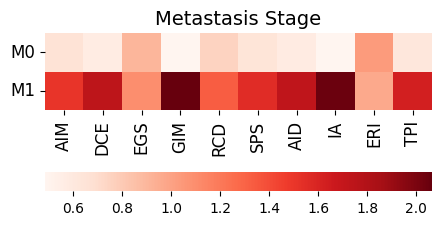

In [151]:
annotations = correlation_p.map(lambda x: '*' if x < 0.05 else '')
    
# Plotting the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=annotations, fmt='', cmap='Reds', square=True,
            cbar_kws={'orientation': 'horizontal', 'pad': 0.2})

ax = plt.gca()
ax.tick_params(axis='y', labelsize=12, rotation=0)
ax.tick_params(axis='x', labelsize=12, rotation=90)
plt.title('Metastasis Stage', size=14)
plt.savefig(f'odds_m_hallmark.png', dpi=1200, bbox_inches='tight')
plt.show()

# TUMOR STAGE

In [152]:
patient_info1 = patient_info[['PATH_T_STAGE']].dropna()
patient_info1 = patient_info1[~patient_info1['PATH_T_STAGE'].isin(['TX'])]
t_mapping = {
    'T1A': 't1', 'T1B': 't1', 'T1': 't1', 'T1A1': 't1', 'T1B1': 't1', 
    'T1B2': 't1', 'T1C': 't1', 'TIS': 't1', 'T0': 't1',
    'T2': 't2', 'T2A': 't2', 'T2B': 't2', 'T2C': 't2', 'T2A1': 't2', 
    'T2A2': 't2',
    'T3': 't3', 'T3A': 't3', 'T3B': 't3', 'T3C': 't3',
    'T4': 't4', 'T4A': 't4', 'T4B': 't4', 'T4D': 't4',
}
patient_info1['PATH_T_STAGE'] = patient_info1['PATH_T_STAGE'].map(t_mapping)
patient_info1 = pd.concat([patient_info1, surv], axis=1).dropna()
patient_info1 = pd.concat([patient_info1, pd.get_dummies(patient_info1["PATH_T_STAGE"], dtype=int)], axis=1)
patient_info1.drop("PATH_T_STAGE", axis=1, inplace=True)
patient_info1 = patient_info1
patient_info1

,AIM,DCE,EGS,GIM,RCD,SPS,AID,IA,ERI,TPI,t1,t2,t3,t4
TCGA-2K-A9WE,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0,0
TCGA-2Z-A9J1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0,0,0
TCGA-2Z-A9J2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0,0,0
TCGA-2Z-A9J3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0,0
TCGA-2Z-A9J5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-ZP-A9D4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0,0,0
TCGA-ZS-A9CD,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0,0
TCGA-ZS-A9CE,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0,1,0,0
TCGA-ZS-A9CF,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0,0


In [153]:
hallmarks_correlation = patient_info1.columns
correlation_matrix = pd.DataFrame(np.zeros((len(hallmarks_correlation), len(hallmarks_correlation))), 
                                      index=hallmarks_correlation, columns=hallmarks_correlation)
correlation_p = correlation_matrix.copy()
for i, h1 in enumerate(hallmarks_correlation):
    for j, h2 in enumerate(hallmarks_correlation):
        if h1 != h2:  # Only calculate for upper triangle
            try:
                # Create a contingency table for the two hallmarks
                contingency_table = pd.crosstab(patient_info1[h2], patient_info1[h1])
                oddsratio, pvalue = stats.fisher_exact(contingency_table)
                correlation_matrix.loc[h1, h2] = oddsratio
                correlation_p.loc[h1, h2] = pvalue
            except:
                pass
correlation_matrix = correlation_matrix.iloc[:10, 10:].T
correlation_p = correlation_p.iloc[:10, 10:].T
correlation_matrix

,AIM,DCE,EGS,GIM,RCD,SPS,AID,IA,ERI,TPI
t1,0.951269,0.657598,0.851204,0.679630,0.550322,0.778003,1.160365,1.194998,0.540682,0.913616
t2,0.780511,0.875274,0.688154,0.900370,0.841598,0.759911,0.820166,0.836180,0.882519,0.786296
t3,0.965199,1.333099,1.303787,1.199755,1.783662,1.224897,0.795076,0.771603,1.650489,1.004920
t4,5.424340,2.990837,4.033551,3.563310,3.045177,5.197696,3.868561,3.488662,3.683967,4.854808


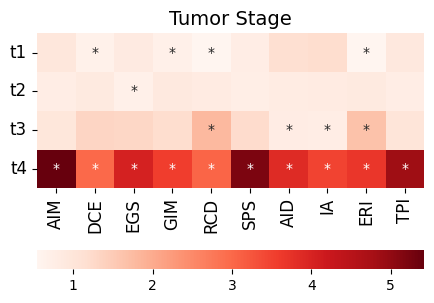

In [154]:
annotations = correlation_p.map(lambda x: '*' if x < 0.05 else '')
    
# Plotting the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=annotations, fmt='', cmap='Reds', square=True,
            cbar_kws={'orientation': 'horizontal', 'pad': 0.2})

ax = plt.gca()
ax.tick_params(axis='y', labelsize=12, rotation=0)
ax.tick_params(axis='x', labelsize=12, rotation=90)
plt.title('Tumor Stage', size=14)
plt.savefig(f'odds_t_hallmark.png', dpi=1200, bbox_inches='tight')
plt.show()